### Análisis de Tutelas
Proyecto:  <a href="https://github.com/Juansemv/MCPP_juan.munoz/tree/master/Proyecto%20final">Análisis tutelar en temas de salud 1992 - 2019</a>

Autor: <a href="https://www.linkedin.com/in/sebastianmunozv/">Juan Sebastian Muñoz Vargas</a>


Objetivo: Analizar el texto de las tutelas extraídas de la 
<a href="http://www.corteconstitucional.gov.co/relatoria/radicador/buscar.php?ponente=&demandado=&Sentencia=&Tipo=Sentencias&busqueda=salud&conector=AND&segundotema=&anios=Todos&pg=0&vs=0&accion=Buscar">página de la Corte Constitucional</a>

Fecha de creación: Noviembre de 2019

In [1]:
import nltk                     #Para Análisis del texto
from nltk import word_tokenize  
from nltk.corpus import stopwords
from collections import Counter #Para realizar conteo
import  PIL
import collections
import pylab
import string
import numpy as np              #Para el uso y manejo de datos
import timeit                   #Para calcular tiempos de ejecución del código
import re                       #Para uso de expresiones regulares
import matplotlib.pyplot as plt #Para realizar los gráficos
import requests                 #Para hacer las solicitudes del codigo fuente de las páginas
from bs4 import BeautifulSoup   #Para transformar el código extraído a formato para poder ser usado en Python
import pandas as pd             #Decarga de pandas para uso de bases de datos
plt.rcParams["figure.figsize"] = [18.0, 8.0]

In [2]:
#Se lee la Base de datos limpia
Tutelas = pd.read_pickle('DBTutelas.pkl')
Tutelas

,Item,Expediente,Año,Mes,Día,Link,Sentencia,Magistrado_Ponente,Demandante,Demandado,Tema,Tutela_no_punt,Demandado_no_punt,Fecha,Tutela_tkn,Demandado_tkn,Tutela_nsw,Demandado_nsw,Tutela_text,Demandado_text
0,1,2130,1992,8,11,http://www.corteconstitucional.gov.co/relatori...,T-484/92,FABIO MORÓN DÍAZ,ALONSO MUÑOZ,,DERECHO A LA SALUD. DERECHO A LA VIDA. SIDA. ...,derecho a la salud derecho a la vida sida iss...,,1992-08-11,"[derecho, a, la, salud, derecho, a, la, vida, ...",[],"[derecho, salud, derecho, vida, sida, iss, con...",[],"(derecho, salud, derecho, vida, sida, iss, con...",()
1,2,2047,1992,8,11,http://www.corteconstitucional.gov.co/relatori...,T-487/92,ALEJANDRO MARTÍNEZ CABALLERO,DANILO MOLINA,,DERECHO A LA SALUD. LIBERTAD DE LOCOMOCION. L...,derecho a la salud libertad de locomocion lib...,,1992-08-11,"[derecho, a, la, salud, libertad, de, locomoci...",[],"[derecho, salud, libertad, locomocion, liberta...",[],"(derecho, salud, libertad, locomocion, liberta...",()
2,3,2193,1992,8,13,http://www.corteconstitucional.gov.co/relatori...,T-491/92,EDUARDO CIFUENTES MUÑOZ,ROSALBA DUQUE,,DERECHO A LA SEGURIDAD SOCIAL. DERECHO A LA S...,derecho a la seguridad social derecho a la sa...,,1992-08-13,"[derecho, a, la, seguridad, social, derecho, a...",[],"[derecho, seguridad, social, derecho, salud, p...",[],"(derecho, seguridad, social, derecho, salud, p...",()
3,4,2359,1992,8,21,http://www.corteconstitucional.gov.co/relatori...,T-499/92,EDUARDO CIFUENTES MUÑOZ,NERY CHIQUIZA,,DERECHO A LA SALUD. DIGNIDAD HUMANA. CAPRECOM...,derecho a la salud dignidad humana caprecom c...,,1992-08-21,"[derecho, a, la, salud, dignidad, humana, capr...",[],"[derecho, salud, dignidad, humana, caprecom, c...",[],"(derecho, salud, dignidad, humana, caprecom, c...",()
4,5,2535,1992,8,28,http://www.corteconstitucional.gov.co/relatori...,T-505/92,EDUARDO CIFUENTES MUÑOZ,DIEGO SERNA,,SERVICIO DE SALUD. DERECHOS DEL ENFERMO. SIDA...,servicio de salud derechos del enfermo sida c...,,1992-08-28,"[servicio, de, salud, derechos, del, enfermo, ...",[],"[servicio, salud, derechos, enfermo, sida, con...",[],"(servicio, salud, derechos, enfermo, sida, con...",()
5,6,2972,1992,9,19,http://www.corteconstitucional.gov.co/relatori...,T-522/92,ALEJANDRO MARTÍNEZ CABALLERO,BALDOYNO ASPRILLA,,DERECHOS DE LOS INTERNOS. DERECHO A LA SALUD....,derechos de los internos derecho a la salud c...,,1992-09-19,"[derechos, de, los, internos, derecho, a, la, ...",[],"[derechos, internos, derecho, salud, concedida]",[],"(derechos, internos, derecho, salud, concedida)",()
6,7,2610,1992,9,23,http://www.corteconstitucional.gov.co/relatori...,T-536/92,SIMON RODRIGUEZ RODRIGUEZ,OLINDA BARRAGAN Y OTRA,,DERECHO AL AMBIENTE SANO. DERECHO A LA SALUD....,derecho al ambiente sano derecho a la salud m...,,1992-09-23,"[derecho, al, ambiente, sano, derecho, a, la, ...",[],"[derecho, ambiente, sano, derecho, salud, medi...",[],"(derecho, ambiente, sano, derecho, salud, medi...",()
7,8,3115,1992,9,24,http://www.corteconstitucional.gov.co/relatori...,T-534/92,CIRO ANGARITA BARON,JORGE A MORENO,,DERECHO A LA SALUD. SERVICIO MILITAR. DERECHO...,derecho a la salud servicio militar derecho a...,,1992-09-24,"[derecho, a, la, salud, servicio, militar, der...",[],"[derecho, salud, servicio, militar, derecho, s...",[],"(derecho, salud, servicio, militar, derecho, s...",()
8,9,3479,1992,10,2,http://www.corteconstitucional.gov.co/relatori...,T-548/92,CIRO ANGARITA BARON,FELIX ROJAS,,DERECHO A LA SALUD. DERECHOS DE LOS PACIENTES...,derecho a la salud derechos de los pacientes ...,,1992-10-02,"[derecho, a, la, salud, derechos, de, los, pac...",[],"[derecho, salud, derechos, pacientes, iss, neg...",[],"(derecho, salud, derechos, pacientes, iss, neg...",()
9,10,D-039,1992,10,20,http://www.corteconstitucional.gov.co/relatori...,C-560/92,SIMON RODRIGUEZ RODRIGUEZ,ABDON ORTIZ,,DEC. 1272/90. ARTS. 3 LIT p) Y 7 LIT ll). REF...,dec 127290 arts 3 lit p y 7 lit ll reforma de...,,1992-10-20,"[dec, 127290, arts, 3, lit, p, y, 

In [3]:
#Número de tutelas disponibles
len(Tutelas)

5834

In [4]:
#Días con más tutelas publicadas
Tutelas['Fecha'].value_counts()

2010-06-16    18
2000-11-21    16
2005-03-17    16
2007-02-01    16
2007-05-10    15
2008-07-01    15
2000-09-07    14
2011-05-17    13
2008-02-28    13
2005-06-16    13
2003-12-04    12
2006-08-31    12
2009-08-06    12
2008-02-15    12
2013-11-12    11
2007-09-25    11
2001-10-25    11
2002-10-31    11
2008-10-10    11
2010-03-23    11
2005-02-03    11
2008-06-26    10
2005-03-31    10
2000-08-09    10
2004-10-28    10
2002-10-10    10
2008-05-29    10
2004-09-01    10
2007-07-27    10
2006-05-22    10
              ..
2008-08-26     1
2007-03-20     1
2015-09-08     1
2018-12-05     1
1995-09-01     1
2011-08-26     1
2009-02-05     1
2008-10-24     1
2012-02-13     1
2018-05-21     1
2018-06-15     1
2016-08-08     1
2002-10-08     1
2008-06-23     1
2017-05-24     1
2008-07-08     1
1997-10-08     1
2001-03-12     1
2008-01-17     1
2000-02-17     1
1998-09-11     1
2002-10-30     1
2013-02-07     1
2001-06-21     1
2018-08-06     1
2005-10-27     1
2016-02-05     1
2019-07-10    

In [5]:
#Se verifica que no hayan duplicados en el día donde hubo más tutelas
list(Tutelas[Tutelas['Fecha'] == '2010-06-16']['Tema'])

['   Debido proceso, igualdad, mínimo vital. El accionante solicita el reconocimiento y pago de su pensión de vejez, la cual le ha sido negada por no cumplir con el número de semanas requeridas para acceder a ella, ya que las cotizaciones realizadas a partir del año 2003 no se tuvieron en cuenta debido a que no acreditó el pago de aportes al Sistema de Salud. La Sala estudia la procedencia de la acción de tutela para el amparo del derecho a la seguridad social en lo que respecta al reconocimiento de la pensión de vejez, pasa a determinar si es un requisito constitucional y legal la cotización en el régimen de seguridad social en',
 '   Salud, vida, seguridad social, trabajo, debido proceso. La accionante comenta que, fue desvinculada de su trabajo por haber llegado a la edad de retiro forzoso, sin tener en cuenta que aun le hacían falta dos años para obtener su pensión de vejez, dejándola desprotegida. La Sala pasa a estudiar la procedencia excepcional de la acción de tutela contra act

In [6]:
# Meses con más tutelas
por_mes = Tutelas['Mes'].value_counts().sort_index();
por_mes

1     238
2     500
3     495
4     426
5     549
6     444
7     561
8     523
9     525
10    595
11    554
12    424
Name: Mes, dtype: int64

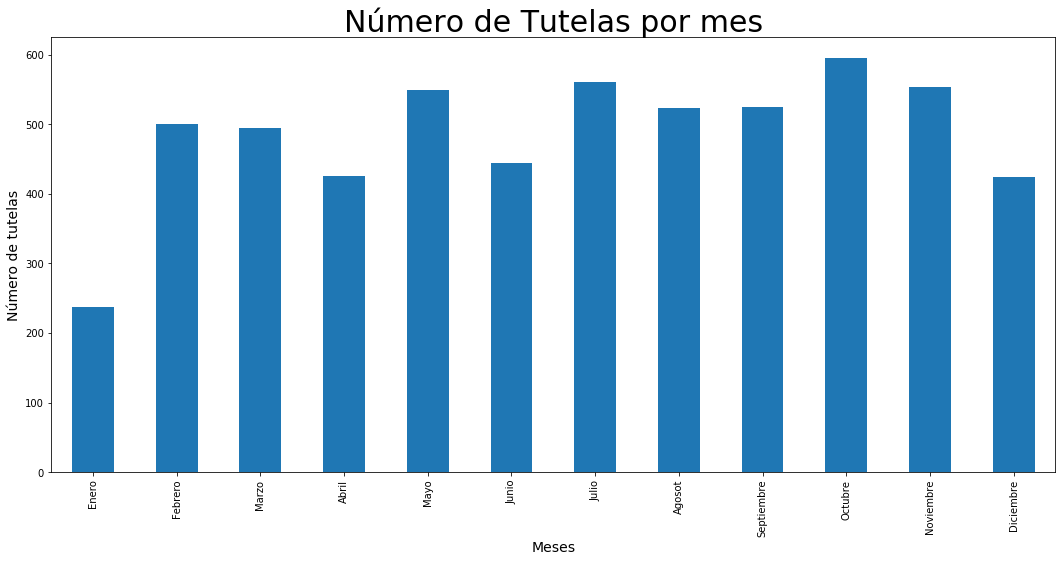

In [7]:
plt.rcParams["figure.figsize"] = [18.0, 8.0]
por_mes.plot.bar()
plt.title("Número de Tutelas por mes", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Meses", fontdict={'fontsize': 14})
labels = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosot','Septiembre','Octubre','Noviembre','Diciembre']
plt.xticks(range(12), labels, rotation='vertical');
plt.savefig('Gráficos/barras_mes.png')

In [8]:
# Años con más tutelas
por_año = Tutelas['Año'].value_counts().sort_index()
por_año

1992     12
1993     24
1994     35
1995     43
1996     43
1997     56
1998     95
1999    153
2000    295
2001    293
2002    279
2003    297
2004    340
2005    424
2006    355
2007    413
2008    459
2009    283
2010    331
2011    242
2012    274
2013    247
2014    238
2015    177
2016    116
2017    133
2018     93
2019     84
Name: Año, dtype: int64

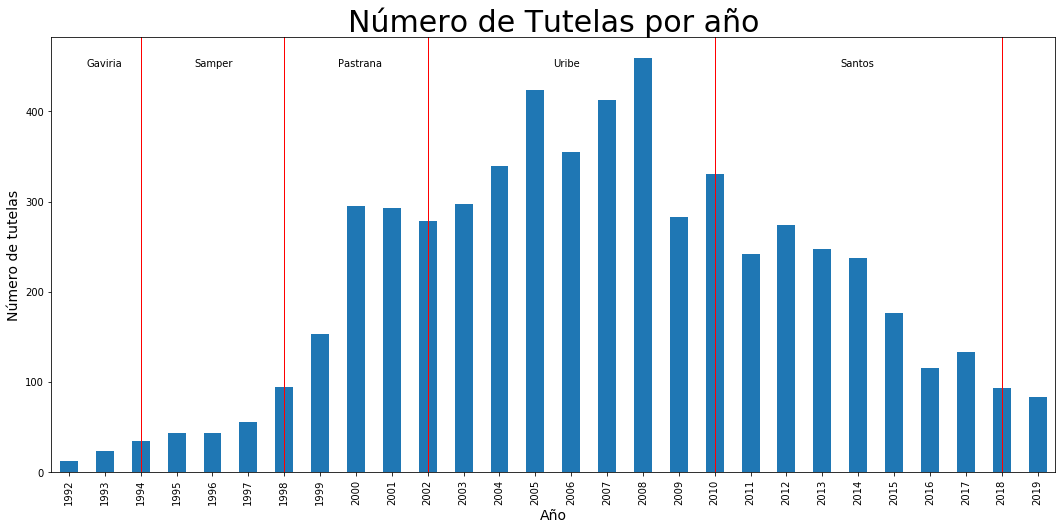

In [9]:
por_año.plot.bar()
plt.title("Número de Tutelas por año", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
# Cambios de periodo gubernamental:
plt.axvline(x=2, linewidth=1, color='r')
plt.axvline(x=6, linewidth=1, color='r')
plt.axvline(x=10, linewidth=1, color='r')
plt.axvline(x=18, linewidth=1, color='r')
plt.axvline(x=26, linewidth=1, color='r')
# Nombres de los presidentes en cada periodo:
plt.text(0.5, 450, r'Gaviria')
plt.text(3.5, 450, r'Samper')
plt.text(7.5, 450, r'Pastrana')
plt.text(13.5, 450, r'Uribe')
plt.text(21.5, 450, r'Santos');

plt.savefig('Gráficos/barras_años.png')

In [10]:
#Histórico de tutelas, por mes
Año_Mes = Tutelas.groupby([Tutelas['Fecha'].dt.year, Tutelas['Fecha'].dt.month])

In [11]:
AñoMes = Año_Mes['Mes'].agg('count')

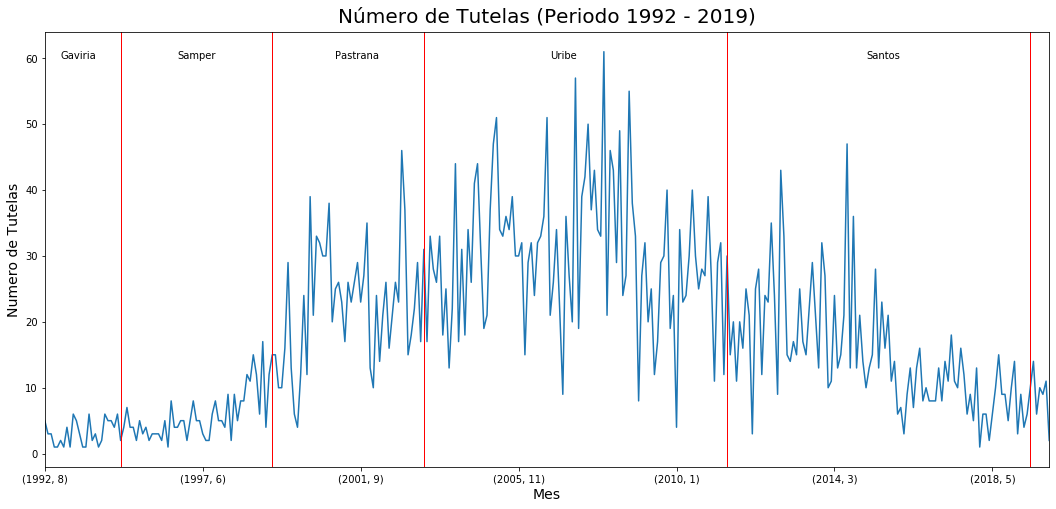

In [12]:
AñoMes.plot()
plt.title("Número de Tutelas (Periodo 1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Numero de Tutelas", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14});
# Cambios de periodo gubernamental:
plt.axvline(x=24, linewidth=1, color='r')
plt.axvline(x=72, linewidth=1, color='r')
plt.axvline(x=120, linewidth=1, color='r')
plt.axvline(x=216, linewidth=1, color='r')
plt.axvline(x=312, linewidth=1, color='r');
# Nombres de los presidentes en cada periodo:
plt.text(5, 60, r'Gaviria')
plt.text(42, 60, r'Samper')
plt.text(92, 60, r'Pastrana')
plt.text(160, 60, r'Uribe')
plt.text(260, 60, r'Santos');

plt.savefig('Gráficos/linea_mes.png')

In [13]:
#Buscamos los magistrados con más tutelas presentadas
Magistrado = Tutelas['Magistrado_Ponente'].value_counts()
Magistrado

HUMBERTO ANTONIO SIERRA PORTO      330
RODRIGO ESCOBAR GIL                307
MARCO GERARDO MONROY CABRA         305
NILSON PINILLA PINILLA             293
ALVARO TAFUR GALVIS                267
MARÍA VICTORIA CALLE CORREA        223
GABRIEL EDUARDO MENDOZA MARTELO    216
ALFREDO BELTRÁN SIERRA             215
JORGE IGNACIO PRETELT CHALJUB      207
JORGE IVÁN PALACIO PALACIO         200
LUIS ERNESTO VARGAS SILVA          196
JAIME ARAUJO RENTERíA              180
JAIME CÓRDOBA TRIVIÑO              170
JAIME CóRDOBA TRIVIñO              164
MANUEL JOSÉ CEPEDA ESPINOSA        164
CLARA INéS VARGAS HERNáNDEZ        163
CLARA INÉS VARGAS HERNÁNDEZ        161
JAIME ARAUJO RENTERÍA              158
MAURICIO GONZÁLEZ CUERVO           157
ALEJANDRO MARTÍNEZ CABALLERO       148
MANUEL JOSé CEPEDA ESPINOSA        147
LUIS GUILLERMO GUERRERO PÉREZ      129
FABIO MORÓN DÍAZ                   122
JOSÉ GREGORIO HERNÁNDEZ GALINDO    113
EDUARDO MONTEALEGRE LYNETT         112
ALBERTO ROJAS RÍOS       

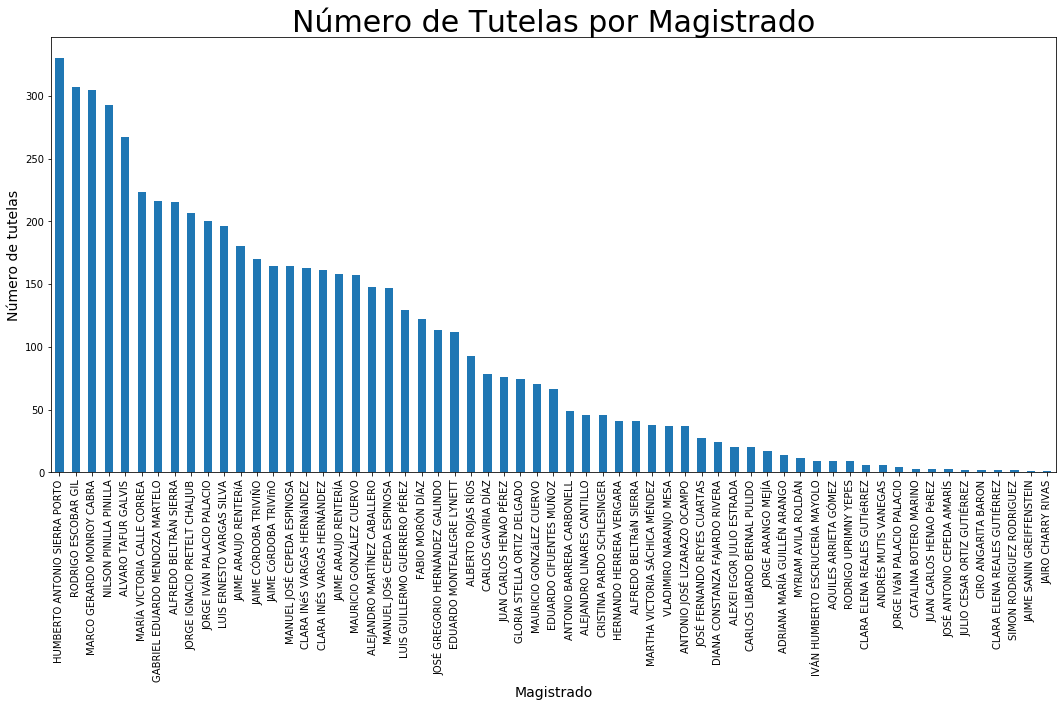

In [14]:
Magistrado.plot.bar()
plt.title("Número de Tutelas por Magistrado", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Magistrado", fontdict={'fontsize': 14});

plt.savefig('Gráficos/barras_magistrado.png')

In [15]:
#Los más demandados
Demandado = Tutelas['Demandado'].value_counts()
Demandado

                                                                                  797
 ISS VS                                                                           233
 SALUDCOOP VS                                                                     112
 COOMEVA VS                                                                       108
 COOMEVA EPS                                                                       88
 NUEVA EPS                                                                         77
 SALUDCOOP EPS                                                                     55
 SALUD TOTAL VS                                                                    50
 SANITAS VS                                                                        46
 CAFESALUD VS                                                                      45
 SALUD TOTAL EPS                                                                   41
 COMPENSAR VS                                         

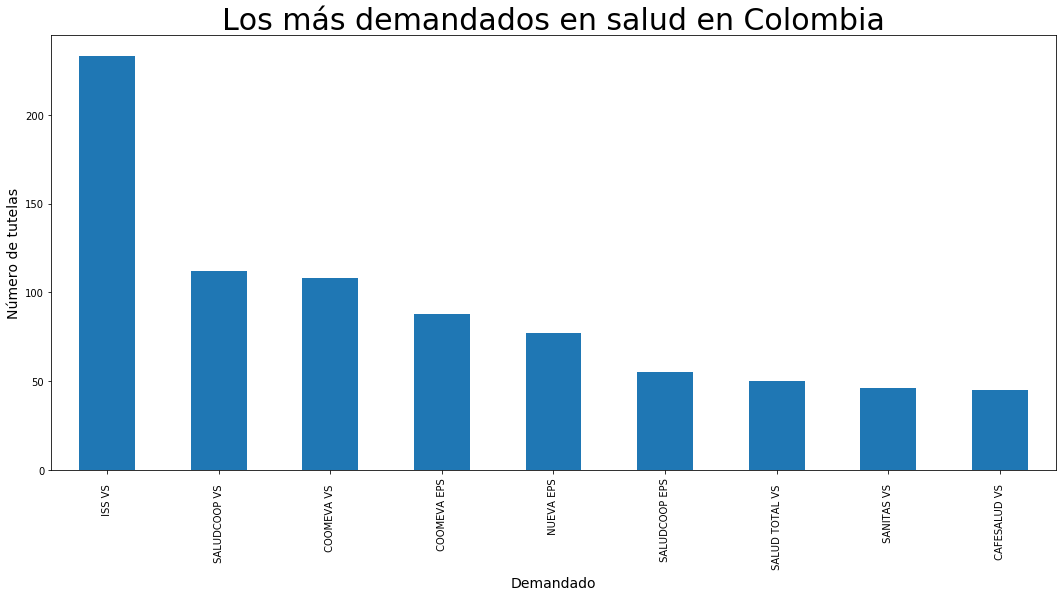

In [16]:
#Los más demandados
Demandado[1:10].plot.bar() #Se coloca desde 1, por en '0' están las demandas sin demandado
plt.title("Los más demandados en salud en Colombia", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Demandado", fontdict={'fontsize': 14});

plt.savefig('Gráficos/barra_demandado.png')

In [17]:
# ¿Hay personas qué demanden mucho por salud?
Demandante = Tutelas['Demandante'].value_counts()
Demandante

                                                                                          24
REVISION DE CONSTITUCIONALIDAD                                                            10
XXX                                                                                        8
JUAN DIEGO BUITRAGO GALINDO                                                                5
XX                                                                                         5
AA                                                                                         4
PEDRO                                                                                      4
FRANCISCO JAVIER GIL GOMEZ                                                                 3
UGPP                                                                                       3
ANDRES EDUARDO DEWDNEY MONTERO                                                             3
AAA                                                                   

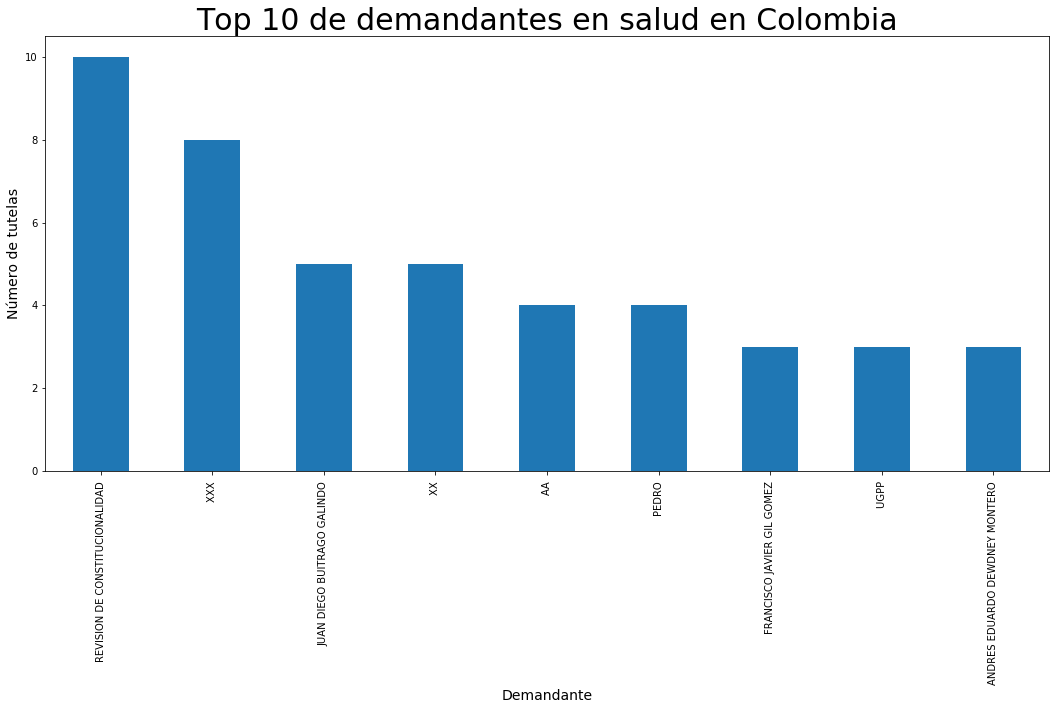

In [18]:
#Los más demandados
Demandante[1:10].plot.bar() #Se coloca desde 1, por en '0' están las demandas sin demandado
plt.title("Top 10 de demandantes en salud en Colombia", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Demandante", fontdict={'fontsize': 14});

plt.savefig('Gráficos/barra_demandante.png')

De todos estos, solo hay 3 correspondiente a personas reales:
    - Juan Diego Buitrago Galindo
    - Andres Eduardo Dewdney Montero
    - Francisco Javier Gil Gomez

# Uso de conceptos a lo largo del tiempo

In [19]:
#Función para contar las palabras
def p_counter(lista_de_palabras, palabra):
    counter = Counter(p for p in lista_de_palabras if p in palabra)
    return counter[palabra]

In [20]:
Tutelas['aborto'] = [p_counter(Tutelas['Tutela_nsw'][i], 'aborto') for i in range(len(Tutelas['Tutela_nsw']))]

In [21]:
Tutelas['eps'] = [p_counter(Tutelas['Tutela_nsw'][i], 'eps') for i in range(len(Tutelas['Tutela_nsw']))]

In [22]:
Tutelas['medicamentos'] = [p_counter(Tutelas['Tutela_nsw'][i], 'medicamentos') for i in range(len(Tutelas['Tutela_nsw']))]

In [23]:
Tutelas['enfermedad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'enfermedad') for i in range(len(Tutelas['Tutela_nsw']))]

In [24]:
Tutelas['vejez'] = [p_counter(Tutelas['Tutela_nsw'][i], 'vejez') for i in range(len(Tutelas['Tutela_nsw']))]

In [25]:
Tutelas['edad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'edad') for i in range(len(Tutelas['Tutela_nsw']))]

In [26]:
Tutelas['niños'] = [p_counter(Tutelas['Tutela_nsw'][i], 'vejez') for i in range(len(Tutelas['Tutela_nsw']))]

In [27]:
Tutelas['vida'] = [p_counter(Tutelas['Tutela_nsw'][i], 'vida') for i in range(len(Tutelas['Tutela_nsw']))]

In [28]:
Tutelas['seguridad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'seguridad') for i in range(len(Tutelas['Tutela_nsw']))]

In [29]:
Tutelas['pos'] = [p_counter(Tutelas['Tutela_nsw'][i], 'pos') for i in range(len(Tutelas['Tutela_nsw']))]

In [30]:
Tutelas['discapacidad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'discapacidad') for i in range(len(Tutelas['Tutela_nsw']))]

In [31]:
Tutelas['cancer'] = [p_counter(Tutelas['Tutela_nsw'][i], 'cancer') for i in range(len(Tutelas['Tutela_nsw']))]

In [32]:
Tutelas['laboral'] = [p_counter(Tutelas['Tutela_nsw'][i], 'laboral') for i in range(len(Tutelas['Tutela_nsw']))]

In [33]:
Tutelas['salud'] = [p_counter(Tutelas['Tutela_nsw'][i], 'salud') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['morir'] = [p_counter(Tutelas['Tutela_nsw'][i], 'morir') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['eutanasia'] = [p_counter(Tutelas['Tutela_nsw'][i], 'eutanasia') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['digna'] = [p_counter(Tutelas['Tutela_nsw'][i], 'digna') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['dignidad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'dignidad') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['pañales'] = [p_counter(Tutelas['Tutela_nsw'][i], 'pañales') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['embarazo'] = [p_counter(Tutelas['Tutela_nsw'][i], 'embarazo') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
Tutelas['conflicto'] = [p_counter(Tutelas['Tutela_nsw'][i], 'embarazo') for i in range(len(Tutelas['Tutela_nsw']))]

In [ ]:
aborto_mes = Año_Mes['aborto'].agg('sum')
eps_mes = Año_Mes['eps'].agg('sum')
medicamentos_mes = Año_Mes['medicamentos'].agg('sum')
enfermedad_mes = Año_Mes['enfermedad'].agg('sum')
vejez_mes = Año_Mes['vejez'].agg('sum')
vida_mes = Año_Mes['vida'].agg('sum')
salud_mes = Año_Mes['salud'].agg('sum')
seguridad = Año_Mes['seguridad'].agg('sum')
pos_mes = Año_Mes['pos'].agg('sum')
discapacidad_mes = Año_Mes['discapacidad'].agg('sum')
laboral_mes = Año_Mes['laboral'].agg('sum')
morir_mes = Año_Mes['morir'].agg('sum')
eutanasia_mes = Año_Mes['eutanasia'].agg('sum')
digna_mes = Año_Mes['digna'].agg('sum')
dignidad_mes = Año_Mes['dignidad'].agg('sum')
pañales_mes = Año_Mes['pañales'].agg('sum')
embarazo_mes = Año_Mes['embarazo'].agg('sum')
edad_mes = Año_Mes['edad'].agg('sum')
niños_mes = Año_Mes['niños'].agg('sum')
conflicto_mes = Año_Mes['conflicto'].agg('sum')

In [ ]:
salud_mes

In [ ]:
morir_mes.plot()
eutanasia_mes.plot()
plt.title("Uso de las palabras 'Morir' y 'Eutanasia'(1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
plt.legend(['Morir', 'Eutanasia'], loc='upper left');

plt.savefig('Gráficos/KW_Eutanasia.png')

A pesar de ser un tema polémico y de amplitud en el debate público, no es tan frecuente que una tutela frente a este tema llegue a la Corte Constitucional.

Probemos con otros temas 'controversiales'.

In [ ]:
aborto_mes.plot()
embarazo_mes.plot()
plt.title("Uso de conceptos de 'embarazo' y 'aborto'(1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
plt.legend(['Aborto', 'Embarazo'], loc='upper left');

plt.savefig('Gráficos/KW_embarazo_aborto.png')

Los problemas relativos al embarazo, son frecuentesdesde el 2004. Mientras el aborto entra a estar presente en el 2006, cuando se reglamenta; y no vuelve a tener tal importancia.
Siendo así, ¿Qué nos dice esto? ¿No es  un tema tan tutelado? ¿No se ha necesitado de más tutelas? ¿Qué rol han jugado los medios de comunicación en el proceso de mediatizar diversos temas?

#### Revisión con  las palabras más usadas en las tutelas

In [ ]:
eps_mes.plot()
medicamentos_mes.plot()
plt.title("Uso de los términos 'EPS' y 'Medicamentos' (1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
plt.legend(['Eps','Medicamentos',], loc='upper left');

plt.savefig('Gráficos/KW_EPS_Medicamentosey_words1_month.png')

In [ ]:
dignidad_mes.plot()
plt.title("Uso del concepto de 'Dignidad' (1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
plt.legend(['Dignidad'], loc='upper left');

plt.savefig('Gráficos/KW_Dignidad.png')

In [ ]:
conflicto_mes.plot()
plt.title("Uso del concepto de 'Conflicto' (1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
plt.legend(['Conflicto'], loc='upper left');

plt.savefig('Gráficos/KW_Conflicto.png')

In [ ]:
enfermedad_mes.plot()
pañales_mes.plot()
plt.title("Uso de conceptos 'Enfermedad' y 'Pañales' (1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
plt.legend(['Enfermedades', 'Pañales'], loc='upper left');

plt.savefig('Gráficos/KW_Enfermedades_Pañales.png')

Si bien el término de enfermedades está presente desde el 94, es visible el aumento en el malestar público de 2005 - 2010. Igualmente, es sorprendete como desde 1999 ecisten problemas referentes a los pañales, y siguen presentes 20 años después

# Análisis de relación del lenguaje

In [ ]:
#Tomo las tutelas sin puntuacion y las separo por un espacio, para tener todas las palabra de las Tutelas en un mismo str.
Todas_Tutelas = Tutelas.Tutela_no_punt.str.cat(sep=' ')

In [ ]:
Todas_Tutelas

In [ ]:
# Se pone todo en minúscula 
Todas_Tutelas = Todas_Tutelas.lower()

In [ ]:
#Cantidad de caracteres
len (Todas_Tutelas)

In [ ]:
tokens = word_tokenize(Todas_Tutelas)

In [ ]:
stopwords_esp = stopwords.words('spanish')

In [ ]:
#Elimino las palabras vacías
tokens = [w for w in tokens if w not in stopwords_esp]

In [ ]:
tokens

In [ ]:
tutelas_nltk = nltk.Text(Todas_Tutelas.split())  # Se pasa el texto de las tutelas, de lista, a formato nltk.Text 
tutelas_nltk

In [ ]:
tutelas_nltk.concordance('aborto')

In [ ]:
tutelas_nltk.concordance('seguridad')

In [ ]:
tutelas_nltk.concordance('morir')

In [ ]:
tutelas_nltk.concordance('vivir')

In [ ]:
tutelas_nltk.concordance('dignidad')

In [ ]:
len (tokens)

In [ ]:
#Cantidad de palabras únicas
len(set(tokens))

In [ ]:
#Ver las más comunes
nltk.FreqDist(tokens).most_common()

In [ ]:
tutelas_nltk.dispersion_plot(["medicamentos","eps","pos", "conflicto"])

In [ ]:
tutelas_nltk.dispersion_plot(["aborto","eutanasia","pañales"])

In [ ]:
tutelas_nltk.dispersion_plot(["embarazo","genero","mujer"])

# Nube de palabras

In [ ]:
#Se seleccionan las palabras de interés, seleccionadas por cantidad de apariciones y relevancia temática
palabras_claves = ['salud', 'Derecho', 'Vida', 'derechos', 'seguridad', 'pos', 'eps', 'servicios', 'tratamiento', \
                  'medico', 'menor', 'digna', 'vital', 'laboral', 'sistema', 'integridad', 'conexidad', 'ley', \
                   'protección', 'licencia', 'maternidad', 'condiciones', 'maternidad', 'subsidiado', 'enfermedad', \
                  'cirugia', 'dignidad', 'procedimiento', 'pension', 'prestación', 'vulneración', 'humana', \
                  'mora', 'examen', 'beneficiaria', 'hijo', 'invalidez', 'incapacidad', 'discapacidad', 'deuda', \
                  'medicamentos', 'niños', 'vejez'] 

In [ ]:
tokens_claves = [w for w in tokens if w in palabras_claves]

In [ ]:
tokens_claves = ' '.join(tokens_claves)

In [ ]:
with open('Nube/tokens_claves.txt', 'a') as f:
    f.write(tokens_claves)

In [ ]:
# Tomado de https://github.com/amueller/word_cloud/blob/master/examples/masked.py

# Paquetes necesarios
from os import path
from PIL import Image
import os
from wordcloud import WordCloud, STOPWORDS

d = path.dirname('/Users/User/Documents/GitHub/MCPP_juan.munoz/Proyecto final/Nube/tokens_claves.txt')

# Read the whole text
text = open(path.join(d, 'tokens_claves.txt')).read()

# Read the mask image
# taken from http://www.zonu.com/images/0X0/2011-08-16-14306/Colombia-outline-map.jpg
health_mask = np.array(Image.open(path.join(d, "Health.png")))

wc = WordCloud(background_color="white", max_words=3000, mask=health_mask)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file(path.join(d, "WordCloud_Health.png"))

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(health_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

¡Gracias!

---